In [1]:
import numpy as np
import pandas as pd
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score
)

In [14]:
df_train = pd.read_csv(r"C:\Users\Habiba Elkashef\Documents\PythonProjects\ML_models\Dataset\train.csv")
df_test  = pd.read_csv(r"C:\Users\Habiba Elkashef\Documents\PythonProjects\ML_models\Dataset\test.csv")

In [3]:
# Features
X = df_train.drop(columns=["label", "label_encoded"]).values
X_test = df_test.drop(columns=["label", "label_encoded"]).values

# Encoded labels (for training)
y = df_train["label_encoded"].values
y_test_encoded = df_test["label_encoded"].values

# Original labels (for reporting)
y_labels = df_train["label"].values
y_test_labels = df_test["label"].values

In [4]:
label_mapping = (
    df_train[["label_encoded", "label"]]
    .drop_duplicates()
    .sort_values("label_encoded")
    .set_index("label_encoded")["label"]
    .to_dict()
)

class_names = list(label_mapping.values())
num_classes = len(class_names)

print("Label mapping:", label_mapping)

Label mapping: {0: 'Benign', 1: 'DNS', 2: 'LDAP', 3: 'MSSQL', 4: 'NTP', 5: 'NetBIOS', 6: 'Portmap', 7: 'SNMP', 8: 'Syn', 9: 'TFTP', 10: 'UDP', 11: 'UDPLag'}


In [5]:
lgb_params = {
    "objective": "multiclass",
    "num_class": num_classes,
    "n_estimators": 300,
    "learning_rate": 0.05,
    "random_state": 42,
    "n_jobs": -1
}

In [6]:
BEST_LGB_MODEL_PATH = "best_lightgbm_model.pkl"

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
cv_f1_scores = []
best_f1 = -1
best_model = None

for train_idx, val_idx in skf.split(X, y):
    print(f"\n========== Fold {fold} ==========")

    X_tr, X_val = X[train_idx], X[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    model = lgb.LGBMClassifier(**lgb_params)
    model.fit(X_tr, y_tr)

    # Predict (encoded)
    y_val_pred_encoded = model.predict(X_val)

    # Convert to original labels
    y_val_pred_labels = pd.Series(y_val_pred_encoded).map(label_mapping)
    y_val_true_labels = pd.Series(y_val).map(label_mapping)

    # F1-score
    f1 = f1_score(y_val_true_labels, y_val_pred_labels, average="weighted")
    cv_f1_scores.append(f1)

    print(f"Fold {fold} F1-score: {f1:.4f}")

    # Save best model
    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        joblib.dump(model, BEST_LGB_MODEL_PATH)
        print("Best model saved")
        print("Best model updated")

    fold += 1

print("\n==============================")
print("F1-score per fold:", cv_f1_scores)
print("Best CV F1-score:", best_f1)


========== Fold 1 ==========
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11627
[LightGBM] [Info] Number of data points in the train set: 276044, number of used features: 52
[LightGBM] [Info] Start training from score -1.483603
[LightGBM] [Info] Start training from score -4.766996
[LightGBM] [Info] Start training from score -4.858820
[LightGBM] [Info] Start training from score -3.376664
[LightGBM] [Info] Start training from score -1.268027
[LightGBM] [Info] Start training from score -5.849973
[LightGBM] [Info] Start training from score -6.446097
[LightGBM] [Info] Start training from score -5.067250
[LightGBM] [Info] Start training from score -2.167466
[LightGBM] [Info] Start training from score -1.472564
[LightGBM] [Info] Start training from score -2.716560
[LightGBM] [Info] Start training from score -3.877816
[LightGBM] [Warning] No further

c:\Users\Habiba Elkashef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 1 F1-score: 0.8088
Best model saved
Best model updated

========== Fold 2 ==========
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11622
[LightGBM] [Info] Number of data points in the train set: 276045, number of used features: 52
[LightGBM] [Info] Start training from score -1.483607
[LightGBM] [Info] Start training from score -4.767000
[LightGBM] [Info] Start training from score -4.858824
[LightGBM] [Info] Start training from score -3.376562
[LightGBM] [Info] Start training from score -1.268030
[LightGBM] [Info] Start training from score -5.849977
[LightGBM] [Info] Start training from score -6.443820
[LightGBM] [Info] Start training from score -5.067254
[LightGBM] [Info] Start training from score -2.167438
[LightGBM] [Info] Start training from score -1.472568
[LightGBM] [Info] Start training from score -2.716618
[LightGBM] [Info] Start t

c:\Users\Habiba Elkashef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 2 F1-score: 0.8752
Best model saved
Best model updated

========== Fold 3 ==========
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11613
[LightGBM] [Info] Number of data points in the train set: 276045, number of used features: 52
[LightGBM] [Info] Start training from score -1.483607
[LightGBM] [Info] Start training from score -4.767000
[LightGBM] [Info] Start training from score -4.859291
[LightGBM] [Info] Start training from score -3.376562
[LightGBM] [Info] Start training from score -1.268030
[LightGBM] [Info] Start training from score -5.849977
[LightGBM] [Info] Start training from score -6.443820
[LightGBM] [Info] Start training from score -5.067254
[LightGBM] [Info] Start training from score -2.167438
[LightGBM] [Info] Start training from score -1.472568
[LightGBM] [Inf

c:\Users\Habiba Elkashef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 3 F1-score: 0.9293
Best model saved
Best model updated

========== Fold 4 ==========
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11624
[LightGBM] [Info] Number of data points in the train set: 276045, number of used features: 52
[LightGBM] [Info] Start training from score -1.483607
[LightGBM] [Info] Start training from score -4.767000
[LightGBM] [Info] Start training from score -4.859291
[LightGBM] [Info] Start training from score -3.376668
[LightGBM] [Info] Start training from score -1.268018
[LightGBM] [Info] Start training from score -5.848720
[LightGBM] [Info] Start training from score -6.446100
[LightGBM] [Info] Start training from score -5.066679
[LightGBM] [Info] Start training from score -2.167470
[LightGBM] [Info] Start training from score -1.472568
[LightGBM] [Info] Start training from score -2.716618
[LightGBM] [Info] Start t

c:\Users\Habiba Elkashef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 4 F1-score: 0.8487

========== Fold 5 ==========
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11614
[LightGBM] [Info] Number of data points in the train set: 276045, number of used features: 52
[LightGBM] [Info] Start training from score -1.483607
[LightGBM] [Info] Start training from score -4.767000
[LightGBM] [Info] Start training from score -4.858824
[LightGBM] [Info] Start training from score -3.376668
[LightGBM] [Info] Start training from score -1.268030
[LightGBM] [Info] Start training from score -5.849977
[LightGBM] [Info] Start training from score -6.446100
[LightGBM] [Info] Start training from score -5.067254
[LightGBM] [Info] Start training from score -2.167470
[LightGBM] [Info] Start training from score -1.472552
[LightGBM] [Info] Start training from score -2.716563
[LightGBM] [Info] Start training from score -3.877820
[LightG

c:\Users\Habiba Elkashef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 5 F1-score: 0.9081

F1-score per fold: [0.8088050200532745, 0.8752426254600226, 0.9293169171564213, 0.848650700044486, 0.9081469924281027]
Best CV F1-score: 0.9293169171564213


In [7]:
# Predict on test set
y_test_pred_encoded = best_model.predict(X_test)

# Convert to original labels
y_test_pred_labels = pd.Series(y_test_pred_encoded).map(label_mapping)

c:\Users\Habiba Elkashef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [8]:
print(
    classification_report(
        y_test_labels,
        y_test_pred_labels,
        digits=4
    )
)

              precision    recall  f1-score   support

      Benign     0.9629    0.9536    0.9582     19566
         DNS     0.2476    0.3474    0.2891       734
        LDAP     0.2222    0.0030    0.0059       669
       MSSQL     0.7127    0.7350    0.7237      2947
         NTP     0.9869    0.9854    0.9861     24274
     NetBIOS     0.1940    0.3387    0.2467       248
     Portmap     0.1250    0.2190    0.1592       137
        SNMP     0.2232    0.2799    0.2484       543
         Syn     0.9443    0.9652    0.9546      9875
        TFTP     0.9899    0.9885    0.9892     19783
         UDP     0.8638    0.8373    0.8503      5702
      UDPLag     0.6318    0.6523    0.6419      1786

    accuracy                         0.9308     86264
   macro avg     0.5920    0.6088    0.5878     86264
weighted avg     0.9317    0.9308    0.9302     86264



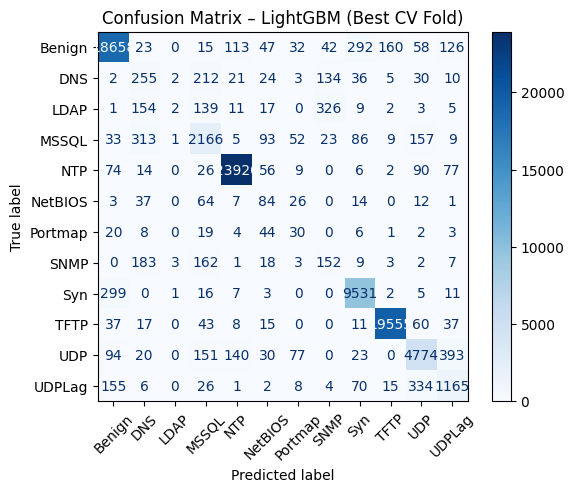

In [9]:
cm = confusion_matrix(
    y_test_labels,
    y_test_pred_labels,
    labels=class_names
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names
)

disp.plot(
    cmap="Blues",
    xticks_rotation=45,
    values_format="d"
)

plt.title("Confusion Matrix – LightGBM (Best CV Fold)")
plt.show()

In [23]:
import joblib
import pandas as pd
import numpy as np

def predict_and_save_lightgbm(
    df,
    model_path,
    label_mapping,
    output_csv,
    label_col="label",
    label_encoded_col="label_encoded"
):
    """
    Predict using a trained LightGBM model and save predictions to CSV.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe (features + label columns).
    model_path : str
        Path to saved LightGBM model (.pkl).
    label_mapping : dict
        Mapping from encoded label -> original label.
    output_csv : str
        Output CSV path.
    label_col : str
        Original label column name.
    label_encoded_col : str
        Encoded label column name.
    """

    # Load model
    model = joblib.load(model_path)

    # Copy dataframe
    df_out = df.copy()

    # Prepare features (drop labels)
    X = df.drop(columns=[label_col, label_encoded_col], errors="ignore")
    X = X.values.astype(np.float32)

    # Predict
    y_pred_encoded = model.predict(X)

    # Decode labels
    y_pred = [label_mapping[int(y)] for y in y_pred_encoded]
    y_true_labels = df[label_col].values
    
    y_pred_labels = (
        pd.Series(y_pred_encoded)
        .map(label_mapping)
        .values
    )
    
    print("\nCVAE – TEST Classification Report")
    print(
        classification_report(
            y_true_labels,
            y_pred_labels,
            digits=4
        )
    )
    

    # Save results
    df_out["prediction"] = y_pred
    df_out.to_csv(output_csv, index=False)

    return df_out


In [24]:
OUTPUT_PATH = "lightgbm_test_predictions.csv"

df_predictions = predict_and_save_lightgbm(
    df=df_test,
    model_path="best_lightgbm_model.pkl",
    label_mapping=label_mapping,
    output_csv=OUTPUT_PATH
)

c:\Users\Habiba Elkashef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



CVAE – TEST Classification Report
              precision    recall  f1-score   support

      Benign     0.9629    0.9536    0.9582     19566
         DNS     0.2445    0.3474    0.2870       734
        LDAP     0.2222    0.0030    0.0059       669
       MSSQL     0.7115    0.7306    0.7209      2947
         NTP     0.9868    0.9854    0.9861     24274
     NetBIOS     0.1944    0.3387    0.2471       248
     Portmap     0.1176    0.2044    0.1493       137
        SNMP     0.2232    0.2799    0.2484       543
         Syn     0.9443    0.9652    0.9546      9875
        TFTP     0.9899    0.9885    0.9892     19783
         UDP     0.8636    0.8371    0.8501      5702
      UDPLag     0.6312    0.6517    0.6413      1786

    accuracy                         0.9306     86264
   macro avg     0.5910    0.6071    0.5865     86264
weighted avg     0.9316    0.9306    0.9301     86264

